<a href="https://colab.research.google.com/github/nirajprasad12/ML_project/blob/main/Version1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Packages
import pandas as pd
import numpy as np
#!pip install xlrd --upgrade 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.special import expit, logit



In [24]:
!pip install libsvm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.6/170.6 KB 1.9 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
Using legacy 'setup.py install' for libsvm, since package 'wheel' is not installed.
  Running setup.py install for libsvm ... done


#Data import

In [2]:
#df = pd.read_excel("default of credit card clients.xls") #Read the excel file

df = pd.read_excel("default of credit card clients.xls", skiprows = 1)

#Data Wrangling

### Exploratory Data Analysis (EDA)

In [3]:
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Converting Bill amt and Pay amt columns to float

In [4]:
#df[df.columns[12:24]] = df[df.columns[12:24]].astype(float) 
df = df.drop('ID', axis=1)

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

### Dropping y labels and storing it in a different variable

In [6]:
y = df['default payment next month']
X = df.drop('default payment next month', axis = 1)

## Visualization to check column correlation

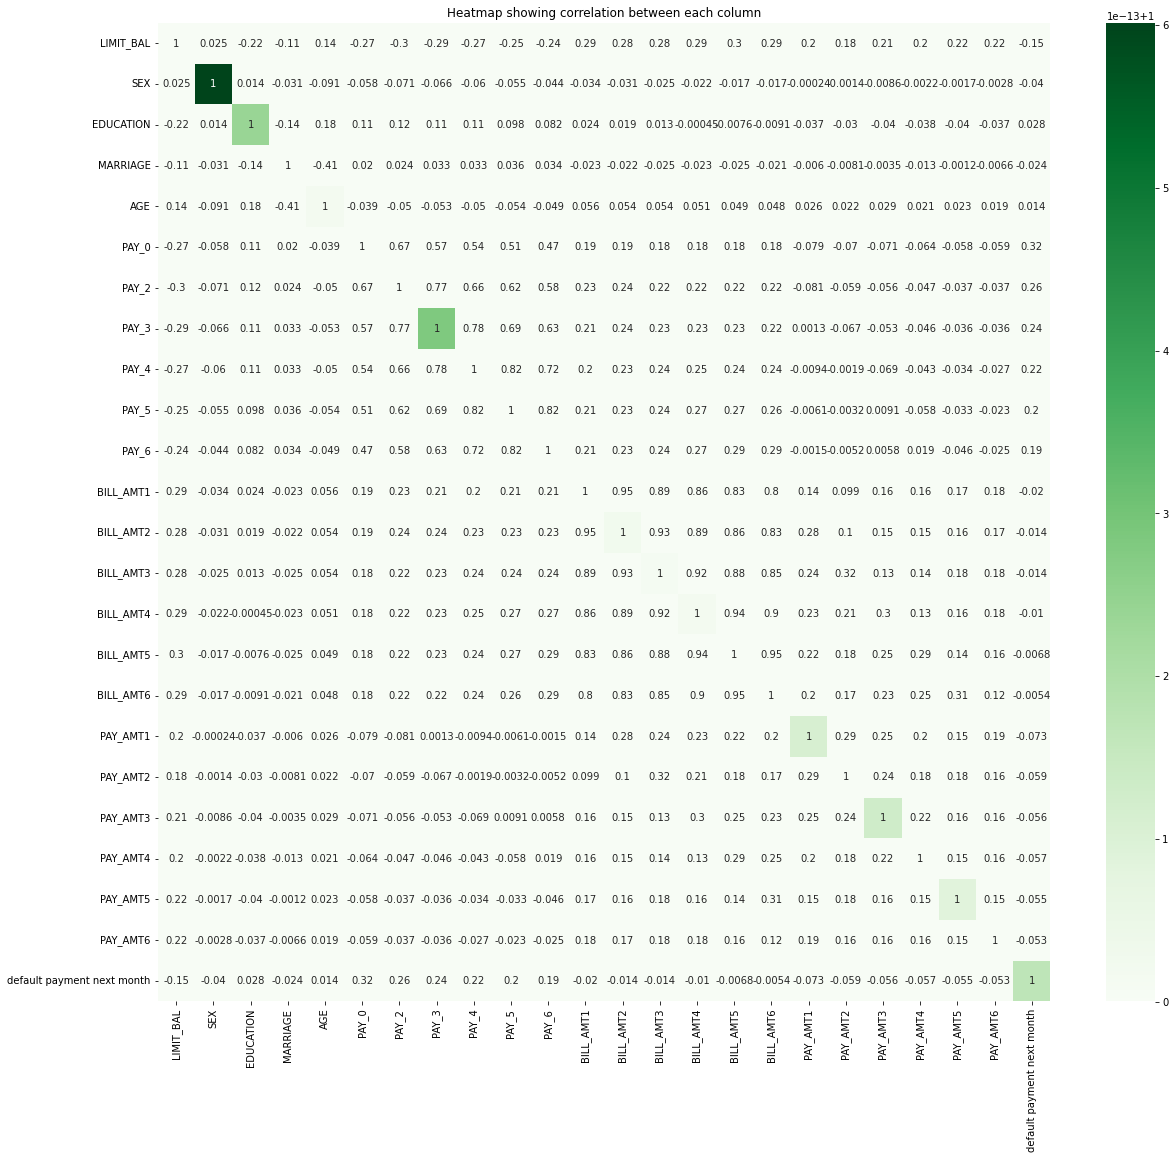

In [7]:
corr = df.corr()
plt.figure(figsize = (20,18))
sns.heatmap(corr, annot = True, vmin = 1.0, cmap = 'Greens')
plt.title('Heatmap showing correlation between each column')
plt.show()

### Nominal vs Ordinal Features

In [8]:
{column: len(df[column].unique()) for column in df.columns}

{'LIMIT_BAL': 81,
 'SEX': 2,
 'EDUCATION': 7,
 'MARRIAGE': 4,
 'AGE': 56,
 'PAY_0': 11,
 'PAY_2': 11,
 'PAY_3': 11,
 'PAY_4': 11,
 'PAY_5': 10,
 'PAY_6': 10,
 'BILL_AMT1': 22723,
 'BILL_AMT2': 22346,
 'BILL_AMT3': 22026,
 'BILL_AMT4': 21548,
 'BILL_AMT5': 21010,
 'BILL_AMT6': 20604,
 'PAY_AMT1': 7943,
 'PAY_AMT2': 7899,
 'PAY_AMT3': 7518,
 'PAY_AMT4': 6937,
 'PAY_AMT5': 6897,
 'PAY_AMT6': 6939,
 'default payment next month': 2}

### Binary Encoding of Norminal Features Education and Marital Status

In [9]:
edu_df = pd.get_dummies(X['EDUCATION'], prefix = 'EDU')
mar_df = pd.get_dummies(X['MARRIAGE'], prefix = 'MAR')
#df_final = X.copy()
X = pd.concat([X, edu_df, mar_df], axis = 1)
X = X.drop(['EDUCATION', 'MARRIAGE'], axis = 1)

In [10]:
X.columns
#X.head()

Index(['LIMIT_BAL', 'SEX', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'EDU_0', 'EDU_1', 'EDU_2', 'EDU_3',
       'EDU_4', 'EDU_5', 'EDU_6', 'MAR_0', 'MAR_1', 'MAR_2', 'MAR_3'],
      dtype='object')

### Scaling

*To standardize all columns to make it even and lies around 0*

In [11]:
scalar_np = StandardScaler()
X_np = scalar_np.fit_transform(X) # Returns numpy array, converting to PD in next line
X = pd.DataFrame(X_np, columns = X.columns)

Mean of all columns are now very close to 0

In [12]:
X.head(), X.mean()

(   LIMIT_BAL       SEX       AGE     PAY_0     PAY_2     PAY_3     PAY_4  \
 0  -1.136720  0.810161 -1.246020  1.794564  1.782348 -0.696663 -0.666599   
 1  -0.365981  0.810161 -1.029047 -0.874991  1.782348  0.138865  0.188746   
 2  -0.597202  0.810161 -0.161156  0.014861  0.111736  0.138865  0.188746   
 3  -0.905498  0.810161  0.164303  0.014861  0.111736  0.138865  0.188746   
 4  -0.905498 -1.234323  2.334029 -0.874991  0.111736 -0.696663  0.188746   
 
       PAY_5     PAY_6  BILL_AMT1  ...     EDU_1   EDU_2     EDU_3     EDU_4  \
 0 -1.530046 -1.486041  -0.642501  ... -0.738375  1.0669 -0.442752 -0.064163   
 1  0.234917  1.992316  -0.659219  ... -0.738375  1.0669 -0.442752 -0.064163   
 2  0.234917  0.253137  -0.298560  ... -0.738375  1.0669 -0.442752 -0.064163   
 3  0.234917  0.253137  -0.057491  ... -0.738375  1.0669 -0.442752 -0.064163   
 4  0.234917  0.253137  -0.578618  ... -0.738375  1.0669 -0.442752 -0.064163   
 
       EDU_5     EDU_6     MAR_0     MAR_1     MAR_2  

# Train Model using packages to compare Accuracy between different models

## Train - Test Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)

## Logistic Regression

In [ ]:
model_LR = LogisticRegression(solver = 'lbfgs', max_iter = 5000).fit(X_train, y_train)

In [ ]:
model_LR.score(X_test, y_test) * 100

In [ ]:
model_gnb = GaussianNB().fit(X_train, y_train)
model_gnb.score(X_test, y_test) * 100

In [ ]:
y_gnb_vals = pd.DataFrame(model_gnb.predict(X_test))
y_gnb_vals.index = y_test. index
pd.concat([y_gnb_vals, y_test], axis = 1)

In [ ]:
model_svm = svm.SVC().fit(X_train, y_train)
model_svm.score(X_test, y_test) * 100

In [ ]:
model_neigh = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
model_neigh.score(X_test, y_test) * 100

In [94]:
class LogisticRegression_Cust:
    
    def __init__(self, X, y, learningRate = 0.01, tolerance=0, maxIteration = 5000):
        self.X = X
        self.y = y
        self.learningRate = learningRate
        self.tolerance = tolerance
        self.maxIteration = maxIteration
        
    def addX0(self, X):
        return np.column_stack([np.ones([X.shape[0], 1]), X])
    
    def sigmoid(self, X):
        #z = X.dot(self.w)
        #sig = 1 / (1+np.exp(-z))
        #return sig
        return expit(X)
    
    def costFunction(self, X, y):
        
        pred_ = np.log(np.ones(X.shape[0]) + np.exp(X.dot(self.w))) - X.dot(self.w).dot(y)
        cost = pred_.mean()
        return cost
    
    def gradientRegularized(self, X, y):
        lambda_term = 0
        sigmoid = self.sigmoid(X.dot(self.w))
        gradient = (sigmoid - y).dot(X)*(1/X.shape[0]) + lambda_term*self.w
        return gradient
    
    def gradientDescent(self, X, y):
        errors = []
        last = float('inf')
        
        for i in tqdm(range(self.maxIteration)):
            self.w = self.w - self.learningRate * self.gradientRegularized(X, y)
            curr = self.costFunction(X, y)
            
            diff = last - curr
            last = curr
            
            errors.append(curr)
            
            if abs(diff) < self.tolerance:
                print("The model stopped learning")
                break  
        
        plt.xlabel('Iterations')
        plt.ylabel('Error')
        plt.plot(list(range(self.maxIteration)), errors, '-r')
        
    def predict(self, X):
        pred = self.sigmoid(X.dot(self.w))
        return np.around(pred)
    
    def evaluate(self, y, y_hat):
        
        y = (y == 1)
        y_hat = (y_hat == 1)
        
        accuracy = (y == y_hat).sum() / y.size
        precision = (y & y_hat).sum() / y_hat.sum()
        recall = (y & y_hat).sum() / y.sum()
        
        return recall, precision, accuracy
    
    def fit(self):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, train_size = 0.8, random_state = 10)
        
        self.w = np.ones(self.X_train.shape[1], dtype = np.float64) * 0
        self.gradientDescent(self.X_train, self.y_train)
        
        #print(self.w)
        
        y_hat_test = self.predict(self.X_test)
        recall, precision, accuracy = self.evaluate(self.y_test, y_hat_test)
        
        print('Over Testing:')
        print("Accuracy was:", accuracy*100)
        print("Recall was:", recall*100)
        print("Precision was:", precision*100)
        
        y_hat_test = self.predict(self.X_train)
        recall, precision, accuracy = self.evaluate(self.y_train, y_hat_test)
        print('')
        print('Over Training:')
        print("Accuracy was:", accuracy*100)
        print("Recall was:", recall*100)
        print("Precision was:", precision*100)
        

100%|██████████████████████████████████████| 5000/5000 [00:15<00:00, 329.39it/s]


Over Testing:
Accuracy was: 59.08333333333333
Recall was: 70.84282460136674
Precision was: 31.05858854860186

Over Training:
Accuracy was: 59.699999999999996
Recall was: 71.63000564015792
Precision was: 31.821598596842897


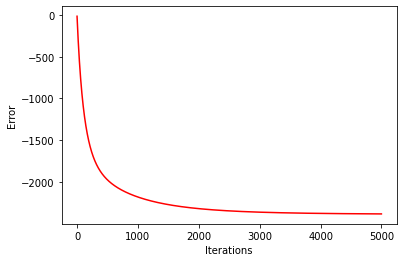

In [95]:
lr = LogisticRegression_Cust(X, y)
lr.fit()

## Classification plot for LR

In [ ]:
X_1 = X_1[['PAY_0', 'BILL_AMT1']]
lr1 = LogisticRegression_Cust(X_1, y)
#lr1.fit()
lr1.showPlots()

In [ ]:
sns.regplot(x= , y=y, data = X, logistic=True, ci=None)

In [ ]:
class MaxMarginClassifier:
    def __init__(self, C):
        self.C = C
    
    def fit(self, X, y):
        N = len(y)
        Xy = X * y[:, np.newaxis]
        #k = self.computeKernel(X)
        #self.gamma = 1/X.shape[0]
        #k = np.exp(-self.gamma*np.sum((X - X[:,np.newaxis])**2, axis = -1))
        #Gramxy = np.outer(y,y)*k
        Gramxy = np.matmul(Xy, Xy.T)
        def ld0(G, alpha):
            return alpha.sum() - 0.5*alpha.dot(alpha.dot(G))
        
        def derivationLd0(G, alpha):
            return np.ones_like(alpha) - alpha.dot(G)
        
        alpha = np.ones(N)
        
        A = np.vstack((-np.eye(N), np.eye(N)))
        b = np.concatenate((np.zeros(N), self.C * np.ones(N)))
        
        
        
        constraints = ({'type': 'eq', 'fun': lambda a: np.dot(a,y) , 'jac' : lambda a: y},
                      {'type': 'ineq', 'fun': lambda a: b - np.dot(A, a), 'jac': lambda a: -A})
        
        print("This passed")
        
        
        optRes = minimize(fun = lambda a: -ld0(Gramxy, a),
                                   x0 = alpha,
                                   jac = lambda a: - derivationLd0(Gramxy, a),
                                   constraints = constraints)
        
        #optRes = minimize(fast_rosenbrock, x_0, args=(N,), method='SLSQP', options={'maxiter': 1e4}, jac=fast_jac)
        
        self.alpha = optRes.x
        self.w = np.sum((self.alpha[:, np.newaxis] * Xy), axis = 0)
        
        
        
        epsilons = 1e-6
        
        self.supportVectors = X[self.alpha > epsilons] #support vector points
        self.supportLabels = y[self.alpha > epsilons]
        
        b = []
        for i in range(len(self.supportVectors)):
            b_i = self.supportLabels[i] - np.matmul(self.supportVectors[i].T, self.w)
            b.append(b_i)
            
        self.intercept = sum(b)/len(b)
        self.b = b
        #print(self.b)
        
        signedDist = np.matmul(self.supportVectors, self.w)
        
        X_1 = X[['LIMIT_BAL', 'SEX', 'AGE']].to_numpy()[:,[0,1,2]]
        
        self.plotSvm(pd.DataFrame(data = X, columns=X[0,1:]),pd.DataFrame(data = y, columns=y[0,1:]))
    
    def predict(self, X):
        return 2*(np.matmul(X, self.w) + self.intercept > 0) - 1, self.w, self.b
    

In [ ]:
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(X, y, train_size = 0.01, random_state = True, stratify = y)

In [ ]:

model = MaxMarginClassifier( C = 5 ) #, gamma = 0.008, kernel = 'rbf' )

model.fit(X_train_small.to_numpy(), y_train_small.to_numpy())
y_pred_small, w, b = model.predict(X_train_small)
y_train1_small = (y_train_small == 1)
y_pred1_small = (y_pred_small == 1)

accuracy = (y_train1_small == y_pred1_small).sum() / y_train1_small.size
precision = (y_train1_small & y_pred1_small).sum() / y_pred1_small.sum()
recall = (y_train1_small & y_pred1_small).sum() / y_train1_small.sum()
print(accuracy*100)

In [27]:
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(X, y, train_size = 0.01, random_state = True, stratify = y)

In [ ]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from mpl_toolkits.mplot3d import Axes3D

iris = datasets.load_iris()
#X = iris.data[:, :3]  # we only take the first three features.
#Y = iris.target

X1 = X_test_small[['LIMIT_BAL', 'PAY_AMT1', 'PAY_0']].to_numpy()
y1 = y_test_small.to_numpy()

#make it binary classification problem
X1 = X1[np.logical_or(y1==0,y1==1)]
y1 = y1[np.logical_or(y1==0,y1==1)]

model = svm.SVC(kernel='linear')
clf = model.fit(X1, y1)

# The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
# Solve for w3 (z)
z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]

tmp = np.linspace(-5,5,30)
x,y = np.meshgrid(tmp,tmp)

fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot3D(X1[y1==0,0], X1[y1==0,1], X1[y1==0,2],'ob')
ax.plot3D(X1[y1==1,0], X1[y1==1,1], X1[y1==1,2],'sr')
ax.plot_surface(x, y, z(x,y))
#view_init(30, 60)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/mlxtend/plotting/decision_regions.py:243: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


Text(0.5, 1.0, 'SVM Decision Region Boundary')

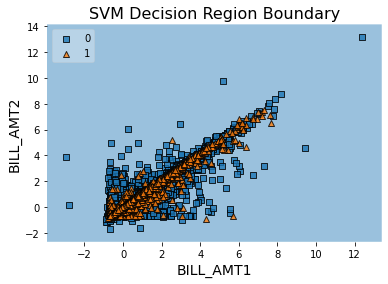

In [37]:
X1 = X_test_small[['BILL_AMT1', 'BILL_AMT2']]
y1 = y_test_small

clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X1.values, y1.values) 

# Plot Decision Region using mlxtend's awesome plotting function
plot_decision_regions(X=X1.values, 
                      y=y1.values,
                      clf=clf, 
                      legend=2)

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel(X1.columns[0], size=14)
plt.ylabel(X1.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)



In [32]:
!pip install mlxtend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 3.5 MB/s eta 0:00:0000:0100:01


In [35]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [79]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 300)
    y = np.linspace(ylim[0], ylim[1], 300)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.75,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s = 300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


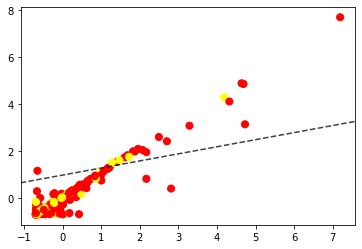

In [98]:
plt.scatter(X_train_small.iloc[:, 9], X_train_small.iloc[:, 10], c = y_train_small, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [83]:
X.columns

Index(['LIMIT_BAL', 'SEX', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'EDU_0', 'EDU_1', 'EDU_2', 'EDU_3',
       'EDU_4', 'EDU_5', 'EDU_6', 'MAR_0', 'MAR_1', 'MAR_2', 'MAR_3'],
      dtype='object')

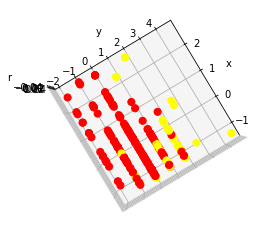

In [93]:
from ipywidgets import interact, fixed
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

g = X_train_small.iloc[:, [0,3,11]].to_numpy()
h = y_train_small.to_numpy()    
interact(plot_3D, elev=[-90, 90], azip=(-180, 180),
         X=fixed(g), y=fixed(h));

In [86]:
!pip install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 KB 1.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 4.7 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.1/245.1 KB 3.8 MB/s eta 0:00:00a 0:00:01


In [91]:
X_train_small.iloc[:, [0,9,10]]

,LIMIT_BAL,BILL_AMT1,BILL_AMT2
29980,-0.905498,-0.098124,-0.000788
22021,-0.982572,-0.340741,-0.313085
23882,-0.365981,-0.399423,-0.397696
24289,0.173537,1.184302,1.292814
12096,-0.905498,-0.056445,-0.010806
...,...,...,...
12278,-1.136720,-0.595363,-0.559528
21916,0.481833,-0.680839,-0.684099
1585,-0.520128,0.308016,0.338191
22355,-1.136720,-0.695900,-0.643915
